In [74]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2017') is None:
    print ("Must set env variable PUI2017")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2017")

import os
import json

Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2017


In [75]:
os.getenv('PUIDATA')

'/home/cusp/yc3300/PUIdata'

In [76]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [106]:
datestring1 = '201503'
datestring2 = '201504'
getCitiBikeCSV(datestring1)
getCitiBikeCSV(datestring2)

file in place, you can continue
file in place, you can continue


In [109]:

df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')

df.append(df2, ignore_index=True)
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,2015-03-01 00:00:00
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,2015-03-01 00:01:00
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,2015-03-01 00:01:00
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,2015-03-01 00:02:00
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,2015-03-01 00:02:00


In [112]:
df['Day'] = df['tripduration'][(df['date'].dt.hour >= 6)&(df['date'].dt.hour <18)]
df['Night'] = df['tripduration'][(df['date'].dt.hour < 6 | (df['date'].dt.hour >= 18))]
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,Day,Night
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,2015-03-01 00:00:00,NaN,669.0
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,2015-03-01 00:01:00,NaN,750.0
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,2015-03-01 00:01:00,NaN,663.0
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,2015-03-01 00:02:00,NaN,480.0
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,2015-03-01 00:02:00,NaN,1258.0


In [113]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,Day,Night
count,3.418260e+05,341826.000000,341826.000000,341826.000000,341826.000000,341826.000000,341826.000000,341826.000000,328973.000000,341826.000000,244158.000000,2.587000e+03
mean,7.343167e+02,436.396251,40.735679,-73.990204,436.697931,40.735458,-73.990486,18057.970190,1975.293744,1.146586,733.782653,1.270426e+03
std,3.049408e+03,319.821679,0.018991,0.011825,320.987481,0.018942,0.011870,2085.432954,11.711420,0.448086,2311.580890,2.142207e+04
min,6.000000e+01,72.000000,40.646768,-74.017134,72.000000,40.646768,-74.017134,14529.000000,1899.000000,0.000000,60.000000,6.300000e+01
25%,3.520000e+02,307.000000,40.722438,-73.998512,307.000000,40.722293,-73.999154,16287.000000,NaN,1.000000,NaN,NaN
50%,5.380000e+02,415.000000,40.737815,-73.990093,412.000000,40.737262,-73.990617,18031.000000,NaN,1.000000,NaN,NaN
75%,8.410000e+02,490.000000,40.750664,-73.981854,490.000000,40.750200,-73.981918,19821.000000,NaN,1.000000,NaN,NaN
max,1.007614e+06,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21760.000000,1999.000000,2.000000,352110.000000,1.007614e+06


In [114]:
df['Day'].dropna(inplace= True)
df['Night'].dropna(inplace= True)

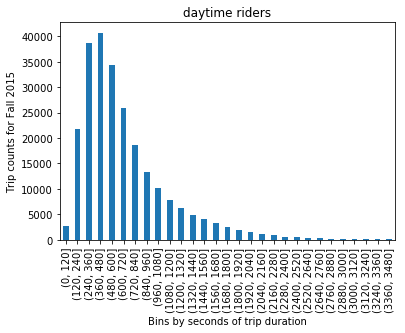

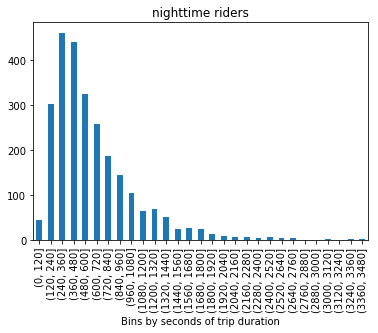

In [115]:
bins = np.arange(0, 3600, 120)

axD = df.Day.groupby(pd.cut(df.Day, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axD.set_title("daytime riders")
axD.set_xlabel("Bins by seconds of trip duration")
axD.set_ylabel("Trip counts for Fall 2015")

axN = df.Night.groupby(pd.cut(df.Night, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axN.set_title("nighttime riders")
axN.set_xlabel("Bins by seconds of trip duration")

              count_nonzero
Day                        
(0, 120]           0.006158
(120, 240]         0.033854
(240, 360]         0.053528
(360, 480]         0.056644
(480, 600]         0.041546
(600, 720]         0.035089
(720, 840]         0.030981
(840, 960]         0.031633
(960, 1080]        0.029946
(1080, 1200]       0.023016
(1200, 1320]       0.024141
(1320, 1440]       0.023321
(1440, 1560]       0.015722
(1560, 1680]       0.012585
(1680, 1800]       0.011878
(1800, 1920]       0.008829
(1920, 2040]       0.006098
(2040, 2160]       0.003930
(2160, 2280]       0.002746
(2280, 2400]       0.001277
(2400, 2520]       0.001581
(2520, 2640]       0.001981
(2640, 2760]       0.001908
(2760, 2880]       0.001051
(2880, 3000]       0.000442
(3000, 3120]       0.000287
(3120, 3240]       0.000269
(3240, 3360]       0.000333
(3360, 3480]       0.000000


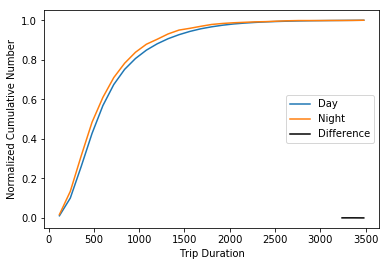

In [116]:
csD = df.Day.groupby(pd.cut(df.Day, bins)).agg([count_nonzero]).cumsum()
csN = df.Night.groupby(pd.cut(df.Night, bins)).agg([count_nonzero]).cumsum()

print(np.abs(csD / csD.max() - csN / csN.max()))

pl.plot(bins[:-1] + 120, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 120, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 120, np.sqrt(csD / csD.max() - csN / csN.max())**2, 'k-', label = "Difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [117]:
import scipy.stats

In [118]:
ks = scipy.stats.ks_2samp(df.Day, df.Night)
print(ks)

Ks_2sampResult(statistic=0.06255886195705636, pvalue=3.6067462403496567e-09)


In [119]:
df2 = df[df.index % 200 == 0]
df2.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,Day,Night
count,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1640.000000,1710.000000,1226.000000,14.000000
mean,708.220468,440.359064,40.736136,-73.989883,444.368421,40.735734,-73.991207,18043.148538,1975.510976,1.138596,725.241436,509.428571
std,738.487381,318.165720,0.018798,0.011778,343.718493,0.019011,0.011660,2117.433558,11.548761,0.448750,818.523213,158.237754
min,63.000000,72.000000,40.683826,-74.017134,72.000000,40.683125,-74.017134,14529.000000,1935.000000,0.000000,63.000000,262.000000
25%,362.000000,313.250000,40.724537,-73.997901,306.250000,40.722284,-73.999744,16206.250000,NaN,1.000000,NaN,NaN
50%,542.000000,422.500000,40.739225,-73.989900,405.000000,40.737050,-73.990765,17972.000000,NaN,1.000000,NaN,NaN
75%,841.000000,488.000000,40.750891,-73.981854,488.000000,40.750664,-73.982681,19902.500000,NaN,1.000000,NaN,NaN
max,16936.000000,3002.000000,40.771522,-73.953809,3002.000000,40.771522,-73.953820,21703.000000,1998.000000,2.000000,16936.000000,712.000000


In [120]:
ks2 = scipy.stats.ks_2samp (df2.Day, df2.Night)
print(ks2)

ValueError: ks_2samp only accepts non-nan inputs

In [121]:
np.random.seed(100)
Day2 = np.random.choice(df['Day'].dropna(), size=df['Night'].count(), replace=False)

df3 = pd.DataFrame(data=[Day2, df['Night'].dropna()]).T
df3.head()

,0,1
0,1394.0,669.0
1,296.0,750.0
2,367.0,663.0
3,326.0,480.0
4,519.0,1258.0


In [122]:
df3.columns = ['Day', 'Night']
df3.describe()

,Day,Night
count,2587.000000,2.587000e+03
mean,737.085041,1.270426e+03
std,1881.538467,2.142207e+04
min,64.000000,6.300000e+01
25%,376.000000,3.270000e+02
50%,549.000000,4.980000e+02
75%,829.500000,7.835000e+02
max,88348.000000,1.007614e+06


In [123]:
df3 = df3.apply(lambda x: x.sort_values().values)
df3.head()

,Day,Night
0,64.0,63.0
1,65.0,67.0
2,68.0,71.0
3,72.0,73.0
4,76.0,75.0


In [124]:
pr = scipy.stats.pearsonr(df3.Day, df3.Night)
print(pr)

(0.96471190021472042, 0.0)


In [126]:
sr = scipy.stats.spearmanr(df3.Day, df3.Night)
print(sr)

SpearmanrResult(correlation=0.99999793353646282, pvalue=0.0)


In [127]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,Day,Night
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,2015-03-01 00:00:00,NaN,669.0
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,2015-03-01 00:01:00,NaN,750.0
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,2015-03-01 00:01:00,NaN,663.0
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,2015-03-01 00:02:00,NaN,480.0
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,2015-03-01 00:02:00,NaN,1258.0


In [128]:
queens = list(range(3119, 3131))
brklyn = [83,119,120,143,144,157,216,217,218,232,233,239,241,242,243,244,245,258,261,262,270,274,275,278,282,289,298,
          310,313,314,321,322,323,324,343,344,353,354,364,365,366,372,373,384,389,390,391,392,395,396,397,398,399,406,
          409,414,416,418,419,420,421,430,431,436,437,443,460,467,471,481,532,539,2000,2001,2002,2005,3041,3042,3043,
          3044,3046,3047,3048,3049,3050,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,
          3067,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077,3079,3080,3081,3082,3083,3084,3085,3086,3087,3088,
          3090,3091,3092,3093,3094,3095,3097,3098,3101,3102,3103,3104,3105,3106,3107,3108,3109,3110,3111,3112,3113,
          3114,3115,3117,3118,3179,3180,3222,3232]

In [129]:
boro=[]
for i in df['start station id'].values:
    if i in queens:
        boro.append(0)
    elif i in brklyn:
        boro.append(1)
    else:
        boro.append(2)

In [130]:
dfboro = pd.DataFrame({'boro':boro})
df4 = pd.concat([df,dfboro], axis=1)
df4.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,Day,Night,boro
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,2015-03-01 00:00:00,NaN,669.0,2
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,2015-03-01 00:01:00,NaN,750.0,1
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,2015-03-01 00:01:00,NaN,663.0,2
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,2015-03-01 00:02:00,NaN,480.0,2
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,2015-03-01 00:02:00,NaN,1258.0,2


In [131]:
df4['ageM'] = 2015 - df4['birth year'][(df4['usertype'] == 'Subscriber') & (df4['boro'] == 2)]
df4['ageB'] = 2015 - df4['birth year'][(df4['usertype'] == 'Subscriber') & (df4['boro'] == 1)]

In [132]:
df4.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,Day,Night,boro,ageM,ageB
count,3.418260e+05,341826.000000,341826.000000,341826.000000,341826.000000,341826.000000,341826.000000,341826.000000,328973.000000,341826.000000,244158.000000,2.587000e+03,341826.000000,309578.000000,19395.000000
mean,7.343167e+02,436.396251,40.735679,-73.990204,436.697931,40.735458,-73.990486,18057.970190,1975.293744,1.146586,733.782653,1.270426e+03,1.938551,39.806814,38.101160
std,3.049408e+03,319.821679,0.018991,0.011825,320.987481,0.018942,0.011870,2085.432954,11.711420,0.448086,2311.580890,2.142207e+04,0.240153,11.792145,10.204927
min,6.000000e+01,72.000000,40.646768,-74.017134,72.000000,40.646768,-74.017134,14529.000000,1899.000000,0.000000,60.000000,6.300000e+01,1.000000,16.000000,16.000000
25%,3.520000e+02,307.000000,40.722438,-73.998512,307.000000,40.722293,-73.999154,16287.000000,NaN,1.000000,NaN,NaN,2.000000,NaN,NaN
50%,5.380000e+02,415.000000,40.737815,-73.990093,412.000000,40.737262,-73.990617,18031.000000,NaN,1.000000,NaN,NaN,2.000000,NaN,NaN
75%,8.410000e+02,490.000000,40.750664,-73.981854,490.000000,40.750200,-73.981918,19821.000000,NaN,1.000000,NaN,NaN,2.000000,NaN,NaN
max,1.007614e+06,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21760.000000,1999.000000,2.000000,352110.000000,1.007614e+06,2.000000,116.000000,105.000000


In [133]:
ageMnull = df4.ageM.isnull()
ageBnull = df4.ageB.isnull()
pctnull = len(df4[ageMnull & ageBnull]) / len(df4) * 100
print('NOTICE: %.2f%% of the data have no age data in the df now'%(pctnull))

NOTICE: 3.76% of the data have no age data in the df now


In [134]:
df4.dropna(how='all', inplace=True)
df4.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,date,Day,Night,boro,ageM,ageB
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,...,21409,Subscriber,1987.0,1,2015-03-01 00:00:00,NaN,669.0,2,28.0,NaN
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,...,19397,Subscriber,1968.0,1,2015-03-01 00:01:00,NaN,750.0,1,NaN,47.0
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,...,20998,Customer,NaN,0,2015-03-01 00:01:00,NaN,663.0,2,NaN,NaN
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,...,21565,Subscriber,1983.0,1,2015-03-01 00:02:00,NaN,480.0,2,32.0,NaN
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,...,14693,Subscriber,1970.0,1,2015-03-01 00:02:00,NaN,1258.0,2,45.0,NaN


In [139]:
ks3 = scipy.stats.ks_2samp(df4.ageM, df4.ageB)
print(ks3)

ValueError: ks_2samp only accepts non-nan inputs

In [141]:
df5 = df4[df4.index % 200 == 0]
df5.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,Day,Night,boro,ageM,ageB
count,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1640.000000,1710.000000,1226.000000,14.000000,1710.000000,1548.000000,92.000000
mean,708.220468,440.359064,40.736136,-73.989883,444.368421,40.735734,-73.991207,18043.148538,1975.510976,1.138596,725.241436,509.428571,1.940936,39.623385,37.228261
std,738.487381,318.165720,0.018798,0.011778,343.718493,0.019011,0.011660,2117.433558,11.548761,0.448750,818.523213,158.237754,0.235814,11.661500,9.213110
min,63.000000,72.000000,40.683826,-74.017134,72.000000,40.683125,-74.017134,14529.000000,1935.000000,0.000000,63.000000,262.000000,1.000000,17.000000,18.000000
25%,362.000000,313.250000,40.724537,-73.997901,306.250000,40.722284,-73.999744,16206.250000,NaN,1.000000,NaN,NaN,2.000000,NaN,NaN
50%,542.000000,422.500000,40.739225,-73.989900,405.000000,40.737050,-73.990765,17972.000000,NaN,1.000000,NaN,NaN,2.000000,NaN,NaN
75%,841.000000,488.000000,40.750891,-73.981854,488.000000,40.750664,-73.982681,19902.500000,NaN,1.000000,NaN,NaN,2.000000,NaN,NaN
max,16936.000000,3002.000000,40.771522,-73.953809,3002.000000,40.771522,-73.953820,21703.000000,1998.000000,2.000000,16936.000000,712.000000,2.000000,80.000000,61.000000


In [142]:
ks4 = scipy.stats.ks_2samp(df5.ageM, df5.ageB)
print(ks4)

ValueError: ks_2samp only accepts non-nan inputs

In [143]:
np.random.seed(1000)
ageM2 = np.random.choice(df4['ageM'].dropna(), size=df4['ageB'].count(), replace=False)

df6 = pd.DataFrame(data=[ageM2, df4['ageB'].dropna()]).T
df6.head()

,0,1
0,33.0,47.0
1,57.0,47.0
2,33.0,45.0
3,52.0,31.0
4,35.0,26.0


In [144]:
df6.columns = ['ageM', 'ageB']
df6.describe()

,ageM,ageB
count,19395.000000,19395.000000
mean,39.865584,38.101160
std,11.834191,10.204927
min,16.000000,16.000000
25%,30.000000,31.000000
50%,38.000000,36.000000
75%,48.000000,45.000000
max,115.000000,105.000000


In [145]:
df6 = df6.apply(lambda x: x.sort_values().values)
df6.head()

,ageM,ageB
0,16.0,16.0
1,16.0,17.0
2,16.0,17.0
3,16.0,17.0
4,16.0,17.0


In [146]:
pr2 = scipy.stats.pearsonr(df6.ageM, df6.ageB)
print(pr2)

(0.99321581800877878, 0.0)


# Null Hypothesis: There is no correlation between Manhattan rider age and Brooklyn rider age ($\rho = 0$)
# Result: We rejected the null hypothesis since the p-value is less than 0.05.

In [147]:
sr2 = scipy.stats.spearmanr(df6.ageM, df6.ageB)
print(sr2)

SpearmanrResult(correlation=0.99905207661429074, pvalue=0.0)


# Null Hypothesis: There is no correlation between Manhattan rider age and Brooklyn rider age ($\rho = 0$)
# Result: We rejected the null hypothesis since the p-value is less than 0.05.